# DNN model + MNIST + Hyper parameters

 - Network layer
   - input nodes : 28x28 = 784
   - hidden1 nodes = 128 - 1층
   - hidden2 nodes = 64 - 2층
   - output nodes = 10 - 3층

 - Hyper parameters
   - lr : 학습율
   - epoch(generation) : 전체 dataset 재사용 횟수
   - batch size : 1회 data 공급 횟수(mini batch)
   - iter size : 반복횟수
   - 1 epoch(60,000) : batch size(200) * iter size(300)
   

In [1]:


import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


Instructions for updating:
non-resource variables are not supported in the long term


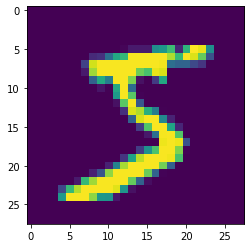

In [2]:

# 1. MNIST dataset load
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape  # (60000, 28, 28)  : images(픽셀)
y_train.shape  # (60000,)  : labels(10진수)

# 첫 번째 image 확인
plt.imshow(x_train[0])  # 5
plt.show()

y_train[0]  # 5  : 10진수
x_train[0]

# images 정규화
x_train_nor, x_test_nor = x_train/255.0, x_test/255.0
x_train_nor[0]
x_test_nor[0]

# 3dim -> 2dim
x_train_nor = x_train_nor.reshape(-1, 784)  # 784 =28 * 28
x_test_nor = x_test_nor.reshape(-1, 784)

x_train_nor.shape  # (60000, 784)
x_test_nor.shape  # (10000, 784)

# label 전처리
# 1) 1dim -> 2dim
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1,1)

# 2) one-hot encoding
obj = OneHotEncoder()
y_train_one = obj.fit_transform(y_train).toarray()
y_test_one = obj.fit_transform(y_test).toarray()
y_train_one.shape  # (60000, 10)
y_test_one.shape  # (10000, 10)


# X, Y 변수 정의
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])


# Hyper parameters
lr = 0.01
epochs = 20
batch_size = 200
iter_size = 300


In [3]:

#############################################
# DNN network
#############################################
hidden1_nodes = 128
hidden2_nodes = 64 

# hidden layer 1
w1 = tf.Variable(tf.random_normal([784,hidden1_nodes]))
b1 = tf.Variable(tf.random_normal([hidden1_nodes]))

hidden1_layer = tf.nn.relu(tf.matmul(X, w1) + b1)

# hidden layer 2
w2 = tf.Variable(tf.random_normal([hidden1_nodes, hidden2_nodes]))
b2 = tf.Variable(tf.random_normal([hidden2_nodes]))

hidden2_layer = tf.nn.relu(tf.matmul(hidden1_layer, w2) + b2)

# hidden layer 3 : model 생성
w3 = tf.Variable(tf.random_normal([hidden2_nodes, 10]))
b3 = tf.Variable(tf.random_normal([10]))

model = tf.matmul(hidden2_layer, w3) + b3


# 5. softmax 알고리즘
# (1) softmax
softmax = tf.nn.softmax(model)  # 활성함수

# (2) loss function : Softmax + Cross Entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    labels = Y, logits = model))  # logit은 모델 역할. 활성함수가 없는 모델을 넣으면 자동으로 활성함수에 넣어줌.

# (3)
train = tf.train.AdamOptimizer(0.1).minimize(loss)

# (4) encoding -> decoding
y_pred = tf.argmax(softmax, axis=1)
y_true = tf.argmax(Y, axis=1)


# 6. model training
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    feed = {X : x_train_nor, Y : y_train_one}
    
    # 반복학습 epochs = 20
    # 1 epoch = 200개 이미지 * 300회 공급 = 60000장
    for epoch in range(epochs) :  # 1세대
        tot_loss = 0
        
        for step in range(iter_size) :  # 300 반복 학습
            idx = np.random.choice(a=y_train_one.shape[0], size=batch_size, replace=False)  # y_train_one.shape[0] = 60000
            
            # Mini batch dataset
            feed = {X:x_train_nor[idx], Y:y_train_one[idx]}
            _, loss_val = sess.run([train, loss], feed_dict=feed)
            
            tot_loss += loss_val
            
        # 1epoch 종료
        avg_loss = tot_loss / iter_size  # loss의 총합 / loss 수
        print("epoch{} : loss = {}".format(epoch+1, avg_loss))
            
            
    # model test
    feed2 = {X:x_test_nor, Y:y_test_one}
    y_pred_re = sess.run(y_pred, feed_dict=feed2)
    y_true_re = sess.run(y_true, feed_dict=feed2)
    
    acc = accuracy_score(y_true_re, y_pred_re)
    print("accuracy =", acc)
    

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

epoch1 : loss = 16.84944469134013
epoch2 : loss = 1.6053912949562072
epoch3 : loss = 1.436315072774887
epoch4 : loss = 1.277008885939916
epoch5 : loss = 1.1244391212860743
epoch6 : loss = 0.9888953373829523
epoch7 : loss = 0.8211476119359334
epoch8 : loss = 0.7222996877630552
epoch9 : loss = 0.6514275400837263
epoch10 : loss = 0.6987380955616633
epoch11 : loss = 0.6696098838249842
epoch12 : loss = 0.8089819166064263
epoch13 : loss = 0.7900441992282867
epoch14 : loss = 0.7333843996127446
epoch15 : loss = 0.778984272480011
epoch16 : loss = 0.7489999404549599
epoch17 : loss = 0.6944647692640622
epoch18 : loss = 0.6814601132273674
epoch19 : loss = 0.7243947091698647
epoch20 : loss = 0.7136899170279503
accuracy = 0.7999
